In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\lglv\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


# Load data

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', delimiter=',', header = None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Renaming columns

In [3]:
col_name = {0:'age',
            1:'workclass',
            2:'fnlwgt',
            3:'education',
            4:'education-num', 
            5:'marital-status',
            6:'occupation',
            7:'relationship',
            8:'race',
            9:'sex',
            10:'capital-gain',
            11:'capital-loss',
            12:'hours-per-week',
            13:'native-country',
            14:'income'
           }

In [4]:
df.rename(columns=col_name, inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [5]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
df.shape

(32561, 15)

In [10]:
df.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [11]:
df = df.replace(' ?', np.NaN)

In [12]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [14]:
df.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [15]:
df.income.value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

<AxesSubplot:xlabel='income', ylabel='count'>

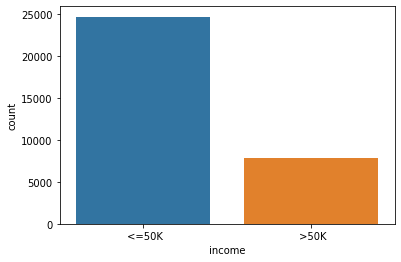

In [16]:
sns.countplot(x='income', data = df)

<AxesSubplot:xlabel='income', ylabel='age'>

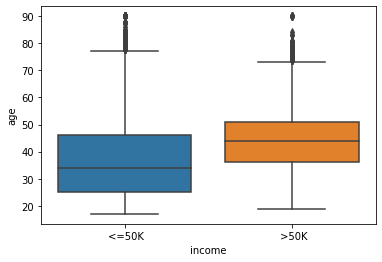

In [17]:
sns.boxplot(y='age',x='income',data=df)

<AxesSubplot:xlabel='income', ylabel='hours-per-week'>

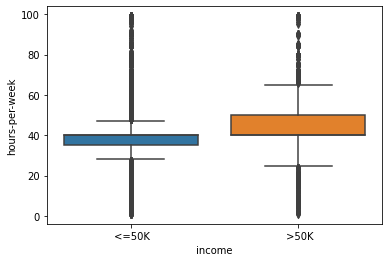

In [18]:
sns.boxplot(y='hours-per-week',x='income',data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

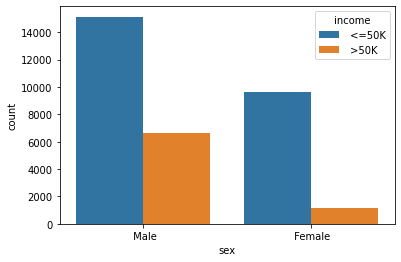

In [19]:
sns.countplot(df['sex'],hue=df['income'])

<AxesSubplot:xlabel='occupation', ylabel='count'>

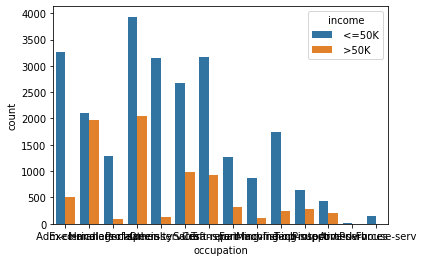

In [20]:
sns.countplot(df['occupation'],hue=df['income'])


<AxesSubplot:xlabel='income', ylabel='education-num'>

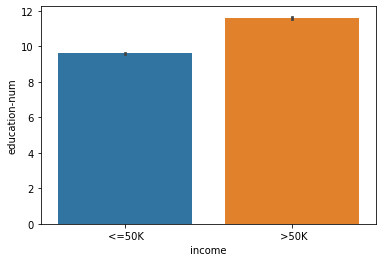

In [21]:
sns.barplot(y="education-num",x="income",data=df)


In [22]:
df.isin([' <=50K']).sum()

age                   0
workclass             0
fnlwgt                0
education             0
education-num         0
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country        0
income            24720
dtype: int64

In [23]:
df.isin(['<=50K ']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [24]:
df.isin([' >50K']).sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation           0
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
income            7841
dtype: int64

In [25]:
df.isin(['>50K ']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [26]:
df['income']=df['income'].map({' <=50K': 0, ' >50K': 1})
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


<AxesSubplot:xlabel='education-num', ylabel='income'>

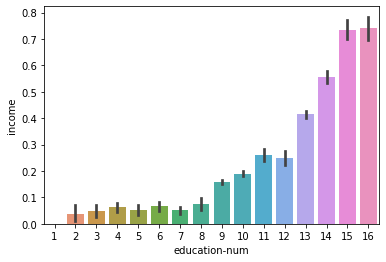

In [27]:
sns.barplot(x="education-num",y="income",data=df)

In [28]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, ' State-gov'),
  Text(1, 0, ' Self-emp-not-inc'),
  Text(2, 0, ' Private'),
  Text(3, 0, ' Federal-gov'),
  Text(4, 0, ' Local-gov'),
  Text(5, 0, ' Self-emp-inc'),
  Text(6, 0, ' Without-pay'),
  Text(7, 0, ' Never-worked')])

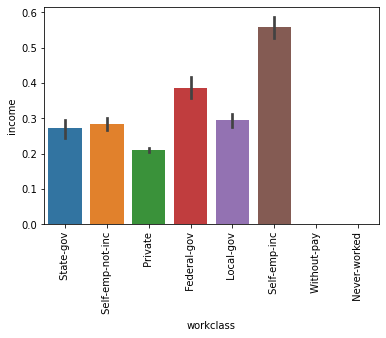

In [29]:
sns.barplot(x="workclass",y="income",data=df)
plt.xticks(rotation=90)

In [30]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

<AxesSubplot:xlabel='education', ylabel='income'>

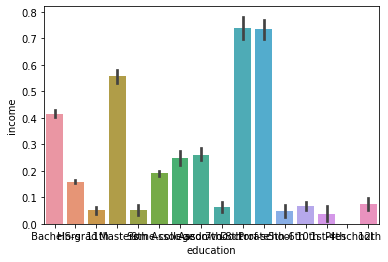

In [31]:
sns.barplot(x="education",y="income",data=df)


In [32]:
df['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

NameError: name 'figure' is not defined

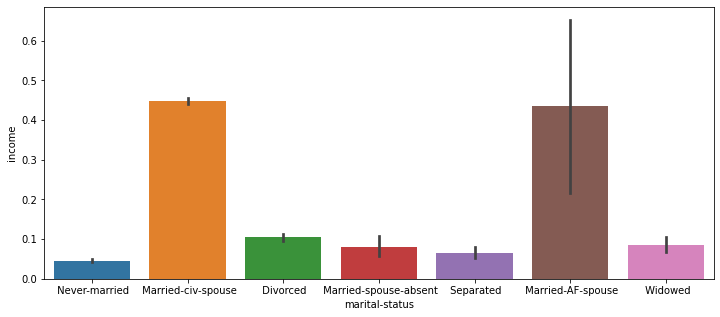

In [34]:
fig, ax = plt.subplots(figsize = (12,5))
sns.barplot(x="marital-status",y="income",data=df)
figure.autofmt_xdate()
plt.xticks(rotation=90)

In [35]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Not-in-family'),
  Text(1, 0, ' Husband'),
  Text(2, 0, ' Wife'),
  Text(3, 0, ' Own-child'),
  Text(4, 0, ' Unmarried'),
  Text(5, 0, ' Other-relative')])

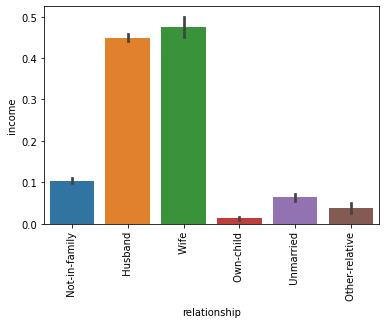

In [36]:
sns.barplot(x="relationship",y="income",data=df)
plt.xticks(rotation=90)

In [37]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 [Text(0, 0, ' United-States'),
  Text(1, 0, ' Cuba'),
  Text(2, 0, ' Jamaica'),
  Text(3, 0, ' India'),
  Text(4, 0, ' Mexico'),
  Text(5, 0, ' South'),
  Text(6, 0, ' Puerto-Rico'),
  Text(7, 0, ' Honduras'),
  Text(8, 0, ' England'),
  Text(9, 0, ' Canada'),
  Text(10, 0, ' Germany'),
  Text(11, 0, ' Iran'),
  Text(12, 0, ' Philippines'),
  Text(13, 0, ' Italy'),
  Text(14, 0, ' Poland'),
  Text(15, 0, ' Columbia'),
  Text(16, 0, ' Cambodia'),
  Text(17, 0, ' Thailand'),
  Text(18, 0, ' Ecuador'),
  Text(19, 0, ' Laos'),
  Text(20, 0, ' Taiwan'),
  Text(21, 0, ' Haiti'),
  Text(22, 0, ' Portugal'),
  Text(23, 0, ' Dominican-Republic'),
  Text(24, 0, ' El-Salvador'),
  Text(25, 0, ' France'),
  Text(26, 0, ' Guatemala'),
  Text(27, 0, ' China'),
  Text(28, 0, ' Japan'),
  Text(29, 0, ' Yugoslavia'

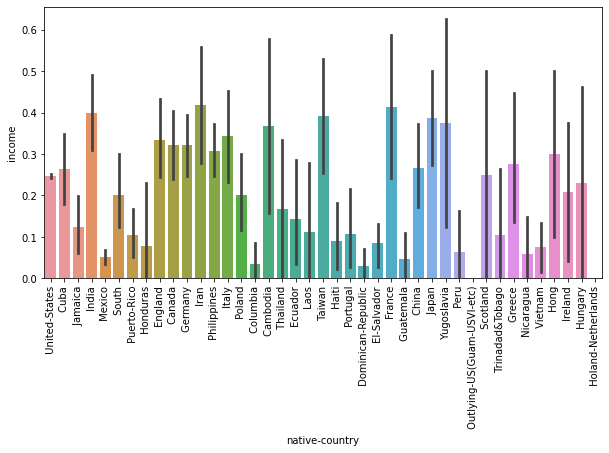

In [38]:
fig, ax = plt.subplots(figsize = (10,5))
sns.barplot(x="native-country",y="income",data=df)
plt.xticks(rotation=90)

# Feature engineering

In [39]:
cat_feture = [fea for fea in df.columns if df[fea].dtype == 'O']
num_feture = [fea for fea in df.columns if df[fea].dtype != 'O']

print('The categorical fetures are:\n', cat_feture, '\n')
print('The nuimerical fetures are:\n',num_feture)

The categorical fetures are:
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'] 

The nuimerical fetures are:
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'income']


In [40]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [41]:
for col in df.columns:
    if df[col].dtypes == 'O':
        df[col] = le.fit_transform(df[col])

In [42]:
df.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
education-num     int64
marital-status    int32
occupation        int32
relationship      int32
race              int32
sex               int32
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int32
income            int64
dtype: object

In [43]:
df.income.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int32
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int32
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int32
 6   occupation      32561 non-null  int32
 7   relationship    32561 non-null  int32
 8   race            32561 non-null  int32
 9   sex             32561 non-null  int32
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int32
 14  income          32561 non-null  int64
dtypes: int32(8), int64(7)
memory usage: 2.7 MB


In [45]:
cat_feture = [fea for fea in df.columns if df[fea].dtype == 'O']
num_feture = [fea for fea in df.columns if df[fea].dtype != 'O']

print('The categorical fetures are:\n', cat_feture, '\n')
print('The nuimerical fetures are:\n',num_feture)

The categorical fetures are:
 [] 

The nuimerical fetures are:
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


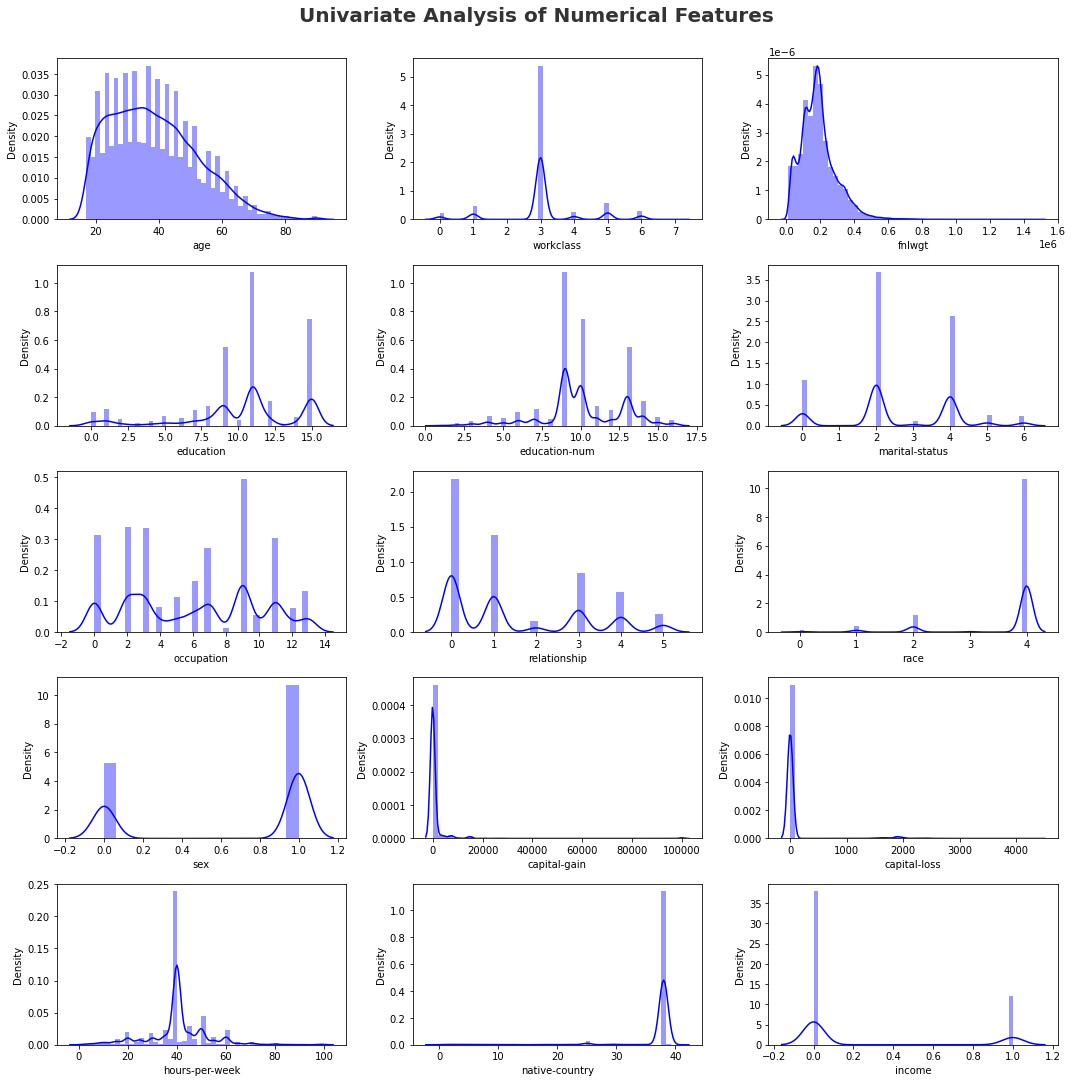

In [46]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_feture)):
    plt.subplot(5, 3, i+1)
    #sns.kdeplot(x=df3[num_fetures[i]],shade=True, color='b')
    sns.distplot(x=df[num_feture[i]], color='b')
    plt.xlabel(num_feture[i])
    plt.tight_layout()

# Now we´ll see the outliers

<AxesSubplot:>

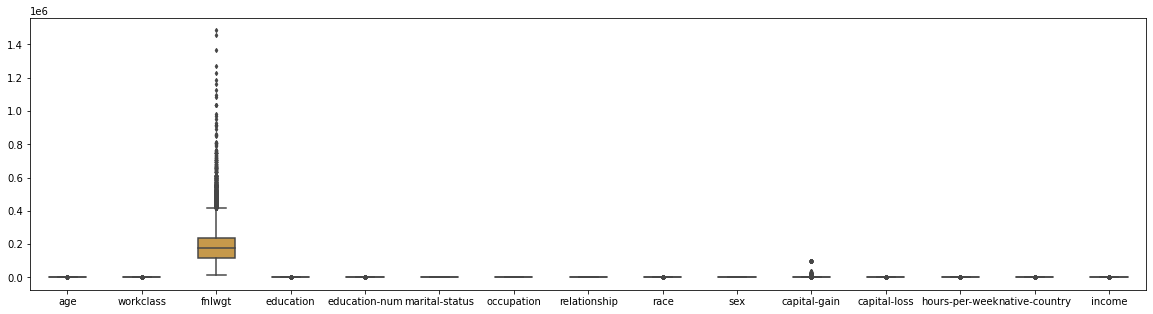

In [47]:
#plt.figure(figsize=(15, 15))
#figure.autofmt_xdate()
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)

<AxesSubplot:xlabel='fnlwgt'>

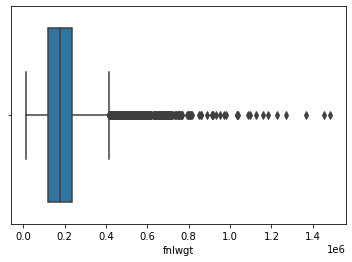

In [49]:
sns.boxplot(df.fnlwgt)

In [50]:
df.fnlwgt.describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

# Handling outliers
### fnlwgt

In [51]:
q = df['fnlwgt'].quantile(0.75)
q

237051.0

In [52]:
df.shape

(32561, 15)

In [53]:
df_cleaned = df[df['fnlwgt']<q]
df_cleaned.shape

(24420, 15)

In [54]:
24420/32561

0.7499769663093885

<AxesSubplot:>

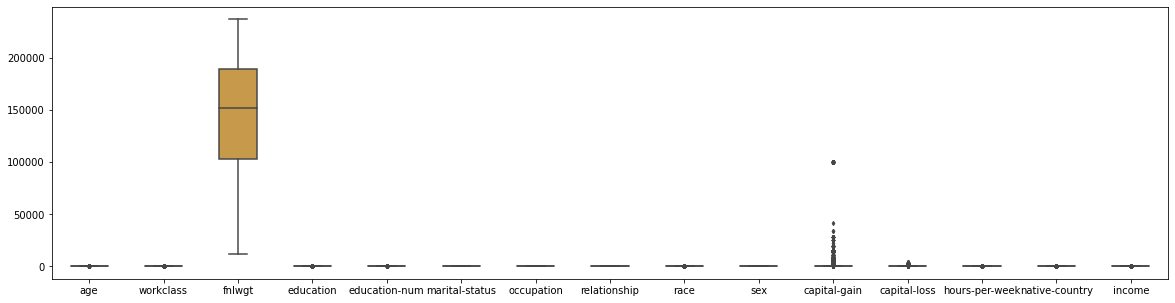

In [55]:
fig, ax = plt.subplots(figsize = (20,5))
sns.boxplot(data = df_cleaned, width = 0.5, ax = ax, fliersize = 3)

# Feature selection with correlation

In [56]:
df_cleaned.corr()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.042862,-0.032319,-0.014051,0.019416,-0.247843,-0.003827,-0.261731,0.024351,0.096569,0.074052,0.056720,0.064005,-0.010530,0.224118
workclass,0.042862,1.000000,-0.030630,0.005254,0.002075,-0.020182,0.003984,-0.064267,0.052258,0.079162,0.027480,0.002507,0.046605,-0.003862,0.004795
fnlwgt,-0.032319,-0.030630,1.000000,-0.014614,-0.021032,0.015744,-0.004156,0.016158,0.027621,-0.005229,0.000743,-0.001403,-0.027410,-0.054103,0.008180
education,-0.014051,0.005254,-0.014614,1.000000,0.342539,-0.035480,-0.042825,-0.010929,0.016841,-0.027720,0.027699,0.015324,0.057606,0.067348,0.069304
education-num,0.019416,0.002075,-0.021032,0.342539,1.000000,-0.067751,0.069037,-0.091657,0.030575,0.018102,0.122622,0.074473,0.150974,0.058624,0.332505
marital-status,-0.247843,-0.020182,0.015744,-0.035480,-0.067751,1.000000,0.030941,0.177659,-0.058871,-0.136669,-0.040031,-0.031259,-0.191306,-0.013375,-0.193389
occupation,-0.003827,0.003984,-0.004156,-0.042825,0.069037,0.030941,1.000000,-0.034273,-0.004868,0.045521,0.011004,0.000348,-0.019884,-0.004634,0.030297
relationship,-0.261731,-0.064267,0.016158,-0.010929,-0.091657,0.177659,-0.034273,1.000000,-0.116940,-0.591961,-0.057746,-0.059534,-0.249848,-0.014304,-0.248397
race,0.024351,0.052258,0.027621,0.016841,0.030575,-0.058871,-0.004868,-0.116940,1.000000,0.093427,0.010776,0.017588,0.043037,0.131636,0.070514
sex,0.096569,0.079162,-0.005229,-0.027720,0.018102,-0.136669,0.045521,-0.591961,0.093427,1.000000,0.048978,0.046860,0.239876,0.018616,0.221936


Text(0.5, 1.0, 'corr between varable')

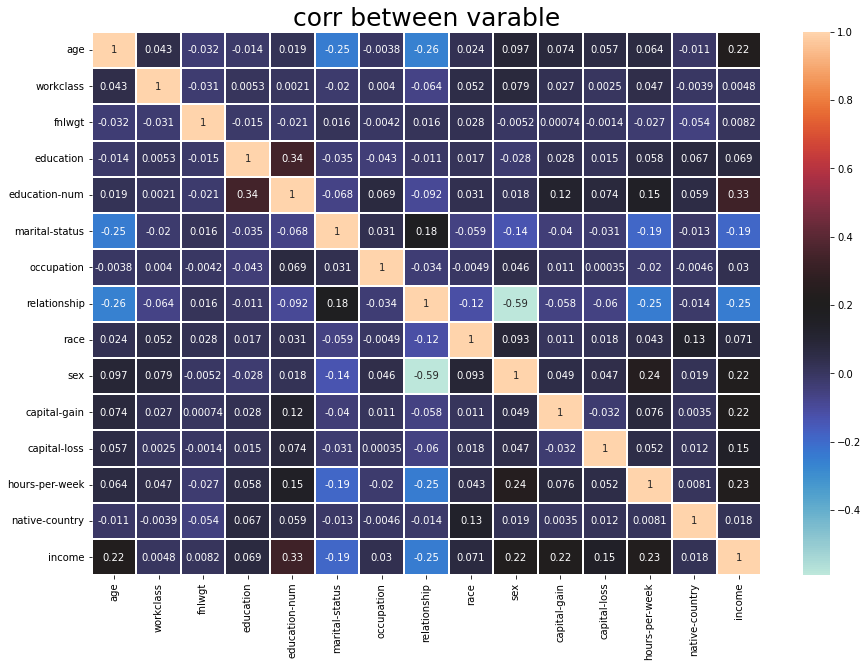

In [57]:
sns.heatmap(df_cleaned.corr(), annot = True, cmap='icefire', linewidths = 0.3)
fig = plt.gcf()
fig.set_size_inches(15,10)
plt.title('corr between varable', color = 'black', size=25)

# Preprocessed data to MongoDB

In [ ]:
client = MongoClient("")

In [58]:
df_cleaned.to_csv('CensusIncome.scv')

# Splitting in X and y variables

In [59]:
X = df_cleaned.iloc[:,:-1]
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38
6,49,3,160187,6,5,3,7,1,2,0,0,0,16,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32552,43,3,84661,8,11,2,11,0,4,1,0,0,45,38
32553,32,3,116138,12,14,4,12,1,1,1,0,0,11,35
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38


In [60]:
y = df_cleaned.iloc[:,-1]
y

0        0
1        0
2        0
3        0
6        0
        ..
32552    0
32553    0
32557    1
32558    0
32559    0
Name: income, Length: 24420, dtype: int64

# Spliting data in train and test sets

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('The shape of X train is:', X_train.shape)
print('The shape of y train is:', y_train.shape)
print('The shape of X test is:', X_test.shape)
print('The shape of y test is:', y_test.shape)

The shape of X train is: (16361, 14)
The shape of y train is: (16361,)
The shape of X test is: (8059, 14)
The shape of y test is: (8059,)


# Feature scaling

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [63]:
X_train_es = scaler.fit_transform(X_train)
X_train_es

array([[ 1.73302778e+00,  1.69936091e+00, -2.02790342e+00, ...,
        -2.17177324e-01, -4.41189098e-01,  2.43800068e-01],
       [ 7.18640975e-01, -9.98524369e-02,  2.90804234e-04, ...,
        -2.17177324e-01, -2.00241944e-01,  2.43800068e-01],
       [ 1.22583438e+00, -9.98524369e-02, -6.70144337e-02, ...,
        -2.17177324e-01,  3.61968081e-01,  2.43800068e-01],
       ...,
       [ 5.73728574e-01, -9.98524369e-02, -1.70908360e+00, ...,
        -2.17177324e-01, -3.96105084e-02,  2.43800068e-01],
       [ 1.80548398e+00,  2.59896759e+00, -5.54263725e-01, ...,
        -2.17177324e-01,  3.61968081e-01,  2.43800068e-01],
       [ 2.45758978e+00,  1.69936091e+00, -5.88625650e-01, ...,
        -2.17177324e-01, -8.42767687e-01,  2.43800068e-01]])

In [64]:
X_test_es = scaler.transform(X_test)
X_test_es

array([[ 0.21144757, -0.09985244, -1.55576847, ..., -0.21717732,
        -0.03961051,  0.24380007],
       [ 0.57372857, -2.79867246, -0.81593626, ..., -0.21717732,
        -0.03961051,  0.24380007],
       [ 1.22583438, -0.09985244, -0.38670994, ..., -0.21717732,
        -0.68213625,  0.24380007],
       ...,
       [ 0.71864097, -0.09985244, -1.5911637 , ..., -0.21717732,
        -0.03961051,  0.24380007],
       [-0.51311443, -0.09985244,  0.13329002, ..., -0.21717732,
        -0.03961051,  0.24380007],
       [ 0.13899137, -0.09985244,  0.46915069, ..., -0.21717732,
         0.36196808,  0.24380007]])

# Evaluation of several classification kernels with SVM (SVC) models

In [65]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train_es, y_train)
y_pred = classifier.predict(X_test_es)
accuracy_score(y_test, y_pred)

0.8040699838689663

In [66]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="poly")
classifier.fit(X_train_es, y_train)
y_pred = classifier.predict(X_test_es)
accuracy_score(y_test, y_pred)

0.8359597965008065

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="rbf")
classifier.fit(X_train_es, y_train)
y_pred = classifier.predict(X_test_es)
accuracy_score(y_test, y_pred)

0.8412954460851222

In [75]:
cls_rep = classification_report(y_test, y_pred)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6030
           1       0.77      0.53      0.63      2029

    accuracy                           0.84      8059
   macro avg       0.81      0.74      0.76      8059
weighted avg       0.83      0.84      0.83      8059



[[5711  319]
 [ 960 1069]]
Confusion Matrix: 




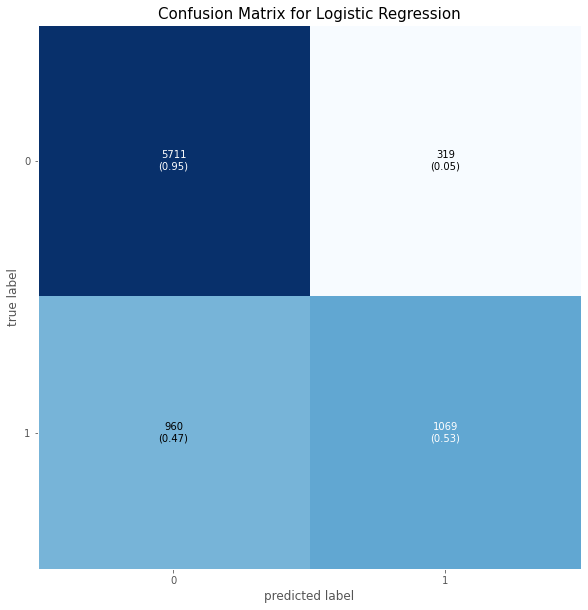

In [77]:
from mlxtend.plotting import plot_confusion_matrix
conf_mtx = confusion_matrix(y_test, y_pred)
print(conf_mtx)
print('Confusion Matrix: \n\n')
plt.style.use("ggplot")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

In [68]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train_es, y_train)
y_pred = classifier.predict(X_test_es)
accuracy_score(y_test, y_pred)

0.7468668569301402

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hyperparameter tuning with GridSearchCV

In [69]:
from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [1, 10, 100, 1000],, 'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'degree':[1,2,3,4,5,6]}
# param_grid = {'C': [1, 10, 100, 1000], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
param_grid = {'C': [1, 10], 'kernel': ['rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid)
grid.fit(X_train_es, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ['rbf', 'poly']})

In [70]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [71]:
grid.score(X_train_es, y_train)

0.853370820854471

In [72]:
grid.score(X_test_es, y_test)

0.8412954460851222

In [73]:
y_pred = grid.predict(X_test_es)
accuracy_score(y_test, y_pred)

0.8412954460851222

In [78]:
cls_rep = classification_report(y_test, y_pred)
print(cls_rep)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6030
           1       0.77      0.53      0.63      2029

    accuracy                           0.84      8059
   macro avg       0.81      0.74      0.76      8059
weighted avg       0.83      0.84      0.83      8059



[[5711  319]
 [ 960 1069]]
Confusion Matrix: 




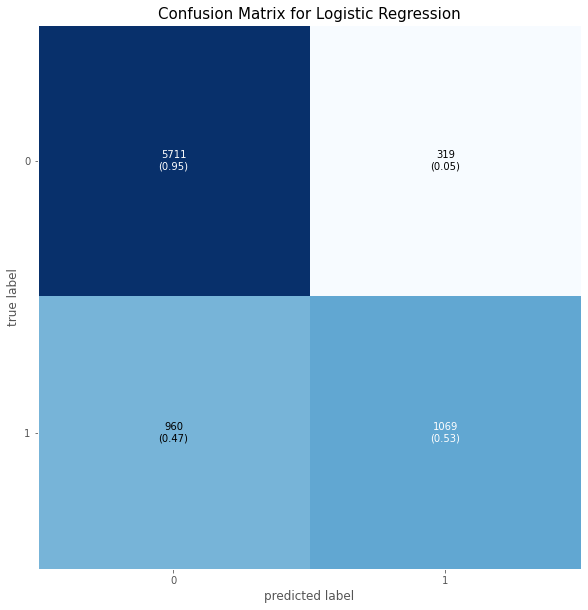

In [79]:
from mlxtend.plotting import plot_confusion_matrix
conf_mtx = confusion_matrix(y_test, y_pred)
print(conf_mtx)
print('Confusion Matrix: \n\n')
plt.style.use("ggplot")
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = cm,figsize=(10,10),show_normed=True)
plt.title('Confusion Matrix for Logistic Regression', fontsize = 15)
plt.show()

# Storage of models

In [80]:
import pickle

In [81]:
with open('scaler.plk', 'wb') as f:
    pickle.dump(scaler, f)
with open('classifier.plk', 'wb') as f:
    pickle.dump(classifier, f)
with open('grid.plk', 'wb') as f:
    pickle.dump(grid, f)

Regression: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

classification:https://archive.ics.uci.edu/ml/datasets/Census+Income




1.	Data ingestion
2.	EDA
3.	Preprocessing
Pickling for the preprocessing object(save the preprocessing model)
After preprocessing you have to store data inside MONGODB

You have to load the data from mongo db
4.	Model

Regression:linear regression,ridge regression,lasso regression,elastic net, support vector regression

Classification: logistic regression,SVM(kernel)

Hyperparameter tuning is mandatory(GRID SEARCH CV)


5.	Evaluation of the model
Regression evaluation matrix: R2 and adjusted R2
Classification confusion matrix, ROC AUC score

Submission form link: https://forms.gle/2PJSSCmL9S865nwe8

Deadline till saturday 12AM IST

USE IDE: jupyter notebook
